#Presentation Link

[Please click on this to view](https://www.canva.com/design/DAFcHKK1Az4/VlaZBKv-LKRkDfSJSRILTA/view?utm_content=DAFcHKK1Az4&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink)

#Librarys

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re,string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import tensorflow as tf
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


#Data Preprocessing

In [ ]:
data=pd.read_csv("/content/drugs.csv")

In [ ]:
data

,name_of_drug,review_by_patient,number_of_times_prescribed,base_score
0,Valsartan,"""It has no side effect, I take it in combinati...",27,8.022969
1,Guanfacine,"""My son is halfway through his fourth week of ...",192,7.858458
2,Lybrel,"""I used to take another oral contraceptive, wh...",17,6.341969
3,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",37,6.590176
4,Cialis,"""2nd day on 5mg started to work with rock hard...",43,6.144782
...,...,...,...,...
32160,Cymbalta,"""I have been taking Cymbalta for 15 months now...",89,6.963020
32161,Nexplanon,"""I have had the Nexplanon since Dec. 27, 2016 ...",0,0.899076
32162,Venlafaxine,"""Had panic attacks and social anxiety starting...",25,6.241812
32163,Fluoxetine,"""I have been off Prozac for about 4 weeks now....",22,7.940428


In [ ]:
data.shape

(32165, 4)

In [ ]:
data['name_of_drug'].unique()

array(['Valsartan', 'Guanfacine', 'Lybrel', ..., 'Benzamycin', 'Midamor',
       'Didrex'], dtype=object)

In [ ]:
data.isnull().sum()

name_of_drug                  0
review_by_patient             0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [ ]:
data["Drug_Review"] = data[["name_of_drug", "review_by_patient"]].apply("-".join, axis=1)
data

,name_of_drug,review_by_patient,number_of_times_prescribed,base_score,Drug_Review
0,Valsartan,"""It has no side effect, I take it in combinati...",27,8.022969,"Valsartan-""It has no side effect, I take it in..."
1,Guanfacine,"""My son is halfway through his fourth week of ...",192,7.858458,"Guanfacine-""My son is halfway through his four..."
2,Lybrel,"""I used to take another oral contraceptive, wh...",17,6.341969,"Lybrel-""I used to take another oral contracept..."
3,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",37,6.590176,"Buprenorphine / naloxone-""Suboxone has complet..."
4,Cialis,"""2nd day on 5mg started to work with rock hard...",43,6.144782,"Cialis-""2nd day on 5mg started to work with ro..."
...,...,...,...,...,...
32160,Cymbalta,"""I have been taking Cymbalta for 15 months now...",89,6.963020,"Cymbalta-""I have been taking Cymbalta for 15 m..."
32161,Nexplanon,"""I have had the Nexplanon since Dec. 27, 2016 ...",0,0.899076,"Nexplanon-""I have had the Nexplanon since Dec...."
32162,Venlafaxine,"""Had panic attacks and social anxiety starting...",25,6.241812,"Venlafaxine-""Had panic attacks and social anxi..."
32163,Fluoxetine,"""I have been off Prozac for about 4 weeks now....",22,7.940428,"Fluoxetine-""I have been off Prozac for about 4..."


In [ ]:
df = data[{'number_of_times_prescribed','base_score','Drug_Review'}]
df

,number_of_times_prescribed,base_score,Drug_Review
0,27,8.022969,"Valsartan-""It has no side effect, I take it in..."
1,192,7.858458,"Guanfacine-""My son is halfway through his four..."
2,17,6.341969,"Lybrel-""I used to take another oral contracept..."
3,37,6.590176,"Buprenorphine / naloxone-""Suboxone has complet..."
4,43,6.144782,"Cialis-""2nd day on 5mg started to work with ro..."
...,...,...,...
32160,89,6.963020,"Cymbalta-""I have been taking Cymbalta for 15 m..."
32161,0,0.899076,"Nexplanon-""I have had the Nexplanon since Dec...."
32162,25,6.241812,"Venlafaxine-""Had panic attacks and social anxi..."
32163,22,7.940428,"Fluoxetine-""I have been off Prozac for about 4..."


In [ ]:
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

cleaned1=lambda x:clean_text1(x)

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer

#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
from bs4 import BeautifulSoup

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [ ]:
import re,string,unicodedata

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [ ]:
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [ ]:
df['Drug_Review']=df['Drug_Review'].apply(denoise_text)

<ipython-input-15-9dfc9ee52171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drug_Review']=df['Drug_Review'].apply(denoise_text)


In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [ ]:
df['Drug_Review']=df['Drug_Review'].apply(remove_special_characters)

<ipython-input-17-c0b7e8a5f0f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drug_Review']=df['Drug_Review'].apply(remove_special_characters)


In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [ ]:
df['Drug_Review']=df['Drug_Review'].apply(simple_stemmer)

<ipython-input-19-d6f7b0c1ce3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drug_Review']=df['Drug_Review'].apply(simple_stemmer)


In [ ]:
from nltk.corpus import stopwords


#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

{"isn't", 'as', "that'll", 'has', 'in', 'not', "needn't", 'are', 'your', 'so', 'up', 'what', 'during', 'wasn', 'm', 'on', 'he', 'being', 've', "shan't", "doesn't", 'did', 'an', "weren't", "won't", 'through', 'over', 'having', 'own', 'won', 'is', "you'd", 'my', 'been', 'do', 'from', 'and', 'after', 'too', 'yours', "hasn't", 'again', 'at', 'me', 'of', 'isn', 'above', 'before', 'shan', 'when', "should've", 'the', "you've", "hadn't", 'hasn', 'yourself', 'was', 'a', 'into', 'how', 'wouldn', 'yourselves', 'o', 'our', 'mightn', 'or', 'down', "you'll", 'just', "mightn't", 'most', 'there', 'now', 'between', 's', 'below', 'all', "couldn't", 'needn', "wouldn't", 'am', 'd', 'more', 're', 'will', 'his', 'nor', 'to', 'should', "she's", 'himself', 'while', 'any', 'll', 'no', 'whom', 'each', 'shouldn', 'ain', 'such', 'theirs', 'y', 'haven', 'few', 'for', 'about', 'them', 'be', 'have', 'if', 'doing', 'with', 'further', "don't", 'which', 'hadn', 'myself', "wasn't", "shouldn't", 'both', 'you', 'weren', '

In [ ]:
df['Drug_Review']=df['Drug_Review'].apply(remove_stopwords)

<ipython-input-21-7ecca6cec719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drug_Review']=df['Drug_Review'].apply(remove_stopwords)


In [ ]:
from nltk.stem import WordNetLemmatizer,SnowballStemmer

def simple_stemmer(text):
    ps = SnowballStemmer(language='english')
    return ' '.join([ps.stem(word) for word in tokenizer.tokenize(text)])

In [ ]:
data['Drug_Review'][0]

'Valsartan-"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'

In [ ]:
#Lemmatizer example

def lemmatize_all(sentence):
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith("NN"):
            yield wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            yield wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            yield wnl.lemmatize(word, pos='a')
        else:
            yield word
            
def lemmatize_text(text):
    return ' '.join(lemmatize_all(text))


df['Drug_Review'][0]

'valsartanit ha side effect take combin bystol 5 mg fish oil'

#Word Cloud

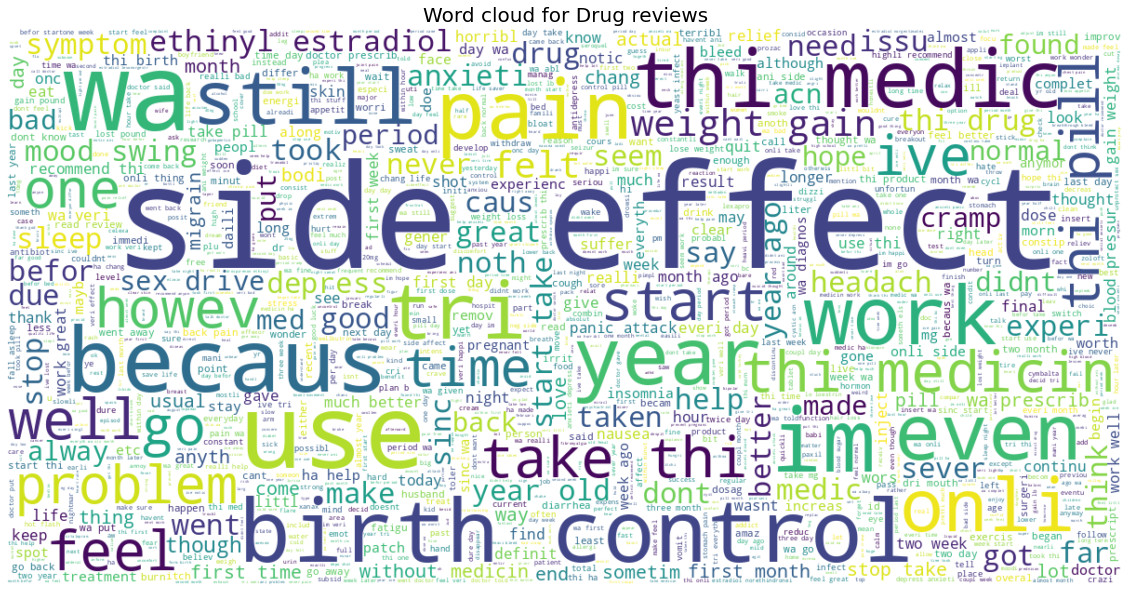

In [ ]:
#word cloud for positive reviews
from wordcloud import WordCloud,STOPWORDS
positive_data = df['Drug_Review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for Drug reviews',fontsize = 20)
plt.show()

#TFIDF Vectorier

In [ ]:
print("\n\nWith TFIDFVectorizer")
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df.Drug_Review)
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")



With TFIDFVectorizer
['10' 'acn' 'ago' 'almost' 'also' 'ani' 'anxieti' 'back' 'bad' 'becaus'
 'befor' 'better' 'birth' 'bleed' 'chang' 'control' 'could' 'cramp' 'day'
 'depress' 'didnt' 'differ' 'doctor' 'dont' 'dose' 'drug' 'effect' 'even'
 'everi' 'experi' 'feel' 'felt' 'first' 'gain' 'get' 'go' 'good' 'got'
 'great' 'ha' 'headach' 'help' 'hour' 'im' 'ive' 'know' 'last' 'life'
 'like' 'littl' 'lot' 'made' 'make' 'medic' 'medicin' 'mg' 'month' 'mood'
 'much' 'need' 'never' 'night' 'normal' 'notic' 'one' 'onli' 'pain'
 'period' 'pill' 'prescrib' 'problem' 'put' 'realli' 'recommend' 'sever'
 'side' 'sinc' 'sleep' 'start' 'still' 'stop' 'take' 'thi' 'thing' 'think'
 'time' 'took' 'tri' 'two' 'use' 'veri' 'wa' 'want' 'week' 'weight' 'well'
 'went' 'work' 'would' 'year']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 

In [ ]:
print("\n\nWith TFIDFVectorizer and removing stop words")
vectorizer = TfidfVectorizer(stop_words=nlp.Defaults.stop_words,max_features=100)
X = vectorizer.fit_transform(df.Drug_Review)
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")

In [ ]:
df['Drug_Review']

In [ ]:
print(X)

##Linear regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
 a = df['Drug_Review']

In [ ]:
vectorizer = TfidfVectorizer(max_features = 16000)

In [ ]:
x = vectorizer.fit_transform(a)

In [ ]:
y = df['base_score']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([ 5.73690175, 10.09581879, -8.11328233, ...,  6.04440156,
        0.86615524,  1.60274697])

In [ ]:
r2_score(y_test,y_pred)

-4.505465721823627

In [ ]:
mean_squared_error(y_test,y_pred)

13.958010724341777

## Decision tree

In [ ]:
df=DecisionTreeRegressor()
df.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = df.predict(x_test)
y_pred

array([7.45186688, 6.12747517, 6.37325898, ..., 8.65679674, 7.90079008,
       7.71525595])

In [ ]:
r2_score(y_test,y_pred)

-0.7245990023638165

In [ ]:
mean_squared_error(y_test,y_pred)

4.372376940748565

##Random forest

In [ ]:
rf = RandomForestRegressor(n_estimators = 15000, random_state = 42)
df.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = df.predict(x_test)
y_pred

array([7.45186688, 6.76582569, 6.37325898, ..., 8.15494906, 7.90079008,
       6.99816137])

In [ ]:
r2_score(y_test,y_pred)

-0.7115659480363334

In [ ]:
mean_squared_error(y_test,y_pred)

4.3393342298743836

#Word2Vec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
sentences = [review.split() for review in data['Drug_Review']]
model = Word2Vec(sentences, size=320, window=5, min_count=1, workers=32)
model.save('word2vec.model')

In [ ]:
# Convert each word to vector and represent the sentence in vector form using the word embeddings
def sentence_vector(sentence,model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv.vocab]
    if len(word_vectors) == 0:
        return np.zeros((320,))
    return np.mean(word_vectors, axis=0)

In [ ]:
# Convert each sentence in the dataset to a vector using the Word2Vec model
word2vec_data = np.array([sentence_vector(sentence, model) for sentence in df['Drug_Review']])
x_train, x_test, y_train, y_test = train_test_split(word2vec_data, y, test_size=0.3, random_state = 42)

##Linear regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

In [ ]:
y_pred = lr.predict(x_test)
y_pred

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
mean_squared_error(y_test,y_pred)

##Decision tree

In [ ]:
df=DecisionTreeRegressor()
df.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = df.predict(x_test)
y_pred

array([7.54449289, 6.38753761, 8.65679674, ..., 8.31130535, 6.83129899,
       6.4936533 ])

In [ ]:
r2_score(y_test,y_pred)

-0.8207767814700251

In [ ]:
mean_squared_error(y_test,y_pred)

4.616216524906972

##Random forest

In [ ]:
rf = RandomForestRegressor(n_estimators = 15000, random_state = 42)
df.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = df.predict(x_test)
y_pred

array([7.54449289, 6.3583125 , 7.82831466, ..., 7.89049875, 6.4936533 ,
       6.4936533 ])

In [ ]:
r2_score(y_test,y_pred)

-0.8471758278192267

In [ ]:
mean_squared_error(y_test,y_pred)

4.683146043801969

# Combining of TFIDF & Word2vec

In [ ]:
def combine_vectors(doc):
    tfidf_vec = vectorizer.transform([doc])
    w2v_vec = sentence_vector(doc, model)
    combined_vec = np.concatenate([np.squeeze(tfidf_vec.toarray()), w2v_vec])
    return combined_vec

In [ ]:
combined_train = np.array([combine_vectors(doc) for doc in df['Drug_Review']])
combined_test = np.array(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(combined_train, combined_test, test_size=0.3, random_state=42)

##Linear regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([7.17317708, 7.37613633, 6.67658276, ..., 6.68454825, 6.82006941,
       6.93639349])

In [ ]:
r2_score(y_test,y_pred)

0.04357289081756999

In [ ]:
mean_squared_error(y_test,y_pred)

2.4248302544326035

##Decision tree

In [ ]:
df=DecisionTreeRegressor()
df.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = df.predict(x_test)
y_pred

array([6.82947586, 6.71052568, 6.62502233, ..., 8.45725515, 6.12747517,
       5.61934244])

In [ ]:
r2_score(y_test,y_pred)

-0.8706451984525594

In [ ]:
mean_squared_error(y_test,y_pred)

4.742647954002782

##Random forest

In [ ]:
rf = RandomForestRegressor(n_estimators = 15000, random_state = 42)
df.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = df.predict(x_test)
y_pred

array([6.29884952, 6.12346147, 5.70702364, ..., 8.49456971, 6.12747517,
       5.52171704])

In [ ]:
r2_score(y_test,y_pred)

-0.8741135652777885

In [ ]:
mean_squared_error(y_test,y_pred)

4.751441306607013